# Notebook visualizing GAN inversion and learned latent spaces

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import continual_benchmark.dataloaders as dataloaders
import continual_benchmark.dataloaders.base
from continual_benchmark.dataloaders.datasetGen import data_split
from gan_experiments.models_definition import Generator, Translator

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import torch
from IPython.display import display, Markdown

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
N_IMAGES_TO_OPTIMIZE = 1000 # number of images to optimize noise for
DATAROOT = os.path.join(os.path.dirname(os.getcwd()), 'data')
NUM_BATCHES = 5
DATASET = 'FashionMNIST'
MODELS_DIR = os.path.join('..', 'results', DATASET, 'CI_5')
DEVICE = 'cuda'
N_IMGS_TO_VISUALIZE = 4

In [4]:
def optimize_noise(images, generator, n_iterations, task_id, lr):
    generator.eval()

    images = images.to(generator.device)
    task_ids = (torch.zeros([len(images)]) + task_id).to(generator.device)
    criterion = torch.nn.MSELoss()

    noise = torch.randn(len(images), generator.latent_dim).to(generator.device)
    noise.requires_grad = True
    
    losses = []

    optimizer = torch.optim.Adam([noise], lr=lr)
    for i in range(n_iterations):
        optimizer.zero_grad()
        generations = generator(noise, task_ids)
        loss = criterion(generations, images)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if i % 100 == 0:
            print(
                f"[Epoch {i}/{n_iterations}] [Loss: {loss.item():.3f}]"
            )

    return noise, losses

In [5]:
def vis_image_grid(images):
    fig = plt.figure(figsize=(2*len(images), 2))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, len(images)),
                     axes_pad=0.2,
                     )

    for ax, im in zip(grid, images):
        if DATASET.lower() in ["cifar10", "celeba"]:
            im = im / 2 + 0.5
        
        im = np.swapaxes(im, 0, 2)
        im = np.swapaxes(im, 0, 1)
        if im.shape[2] == 1:
            ax.imshow(im, cmap="gray" if DATASET.lower() in ['mnist', 'fashionmnist', 'omniglot', 'doublemnist'] else None)
        else:
            ax.imshow(im)
        ax.axis('off')
    
    plt.show()

In [6]:
train_dataset, val_dataset = dataloaders.base.__dict__[DATASET](
        DATAROOT, False, False
    )

train_dataset_splits, val_dataset_splits, task_output_space = data_split(
    dataset=train_dataset,
    dataset_name=DATASET,
    num_batches=NUM_BATCHES,
    num_classes=train_dataset.number_classes,
    random_split=False,
    random_mini_shuffle=False,
    limit_data=None,
    dirichlet_split_alpha=None,
    reverse=False,
    limit_classes=-1,
)

Data has been normalized
Prepared dataset with splits: [(0, 8336), (1, 8411), (2, 8445), (3, 8299), (4, 8365)]
Validation dataset with splits: [(0, 3664), (1, 3589), (2, 3555), (3, 3701), (4, 3635)]


## GAN inversion

# <span style='color:blue'>Task nr 0</span>

### Learning rate of noise optimization = 0.1

[Epoch 0/1000] [Loss: 0.450]
[Epoch 100/1000] [Loss: 0.076]
[Epoch 200/1000] [Loss: 0.069]
[Epoch 300/1000] [Loss: 0.066]
[Epoch 400/1000] [Loss: 0.063]
[Epoch 500/1000] [Loss: 0.062]
[Epoch 600/1000] [Loss: 0.060]
[Epoch 700/1000] [Loss: 0.059]
[Epoch 800/1000] [Loss: 0.058]
[Epoch 900/1000] [Loss: 0.057]


### Original images:

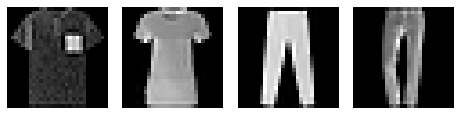

### Generations from optimized noise:

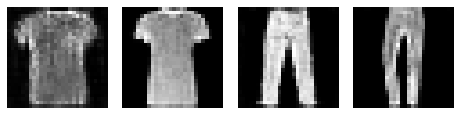

# <span style='color:blue'>Task nr 1</span>

### Learning rate of noise optimization = 0.1

[Epoch 0/1000] [Loss: 0.552]
[Epoch 100/1000] [Loss: 0.075]
[Epoch 200/1000] [Loss: 0.069]
[Epoch 300/1000] [Loss: 0.066]
[Epoch 400/1000] [Loss: 0.065]
[Epoch 500/1000] [Loss: 0.063]
[Epoch 600/1000] [Loss: 0.062]
[Epoch 700/1000] [Loss: 0.061]
[Epoch 800/1000] [Loss: 0.060]
[Epoch 900/1000] [Loss: 0.059]


### Original images:

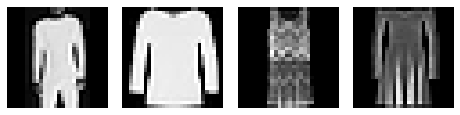

### Generations from optimized noise:

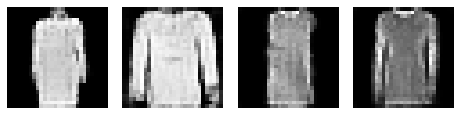

# <span style='color:blue'>Task nr 2</span>

### Learning rate of noise optimization = 0.1

[Epoch 0/1000] [Loss: 0.668]
[Epoch 100/1000] [Loss: 0.130]
[Epoch 200/1000] [Loss: 0.114]
[Epoch 300/1000] [Loss: 0.104]
[Epoch 400/1000] [Loss: 0.098]
[Epoch 500/1000] [Loss: 0.095]
[Epoch 600/1000] [Loss: 0.092]
[Epoch 700/1000] [Loss: 0.089]
[Epoch 800/1000] [Loss: 0.087]
[Epoch 900/1000] [Loss: 0.086]


### Original images:

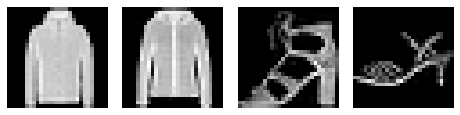

### Generations from optimized noise:

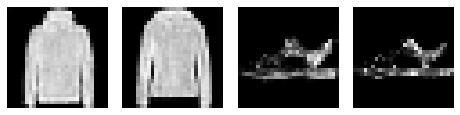

# <span style='color:blue'>Task nr 3</span>

### Learning rate of noise optimization = 0.1

[Epoch 0/1000] [Loss: 0.586]
[Epoch 100/1000] [Loss: 0.096]
[Epoch 200/1000] [Loss: 0.076]
[Epoch 300/1000] [Loss: 0.066]
[Epoch 400/1000] [Loss: 0.059]
[Epoch 500/1000] [Loss: 0.053]
[Epoch 600/1000] [Loss: 0.049]
[Epoch 700/1000] [Loss: 0.045]
[Epoch 800/1000] [Loss: 0.044]
[Epoch 900/1000] [Loss: 0.042]


### Original images:

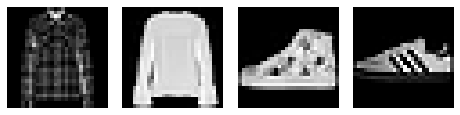

### Generations from optimized noise:

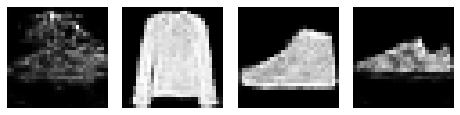

# <span style='color:blue'>Task nr 4</span>

### Learning rate of noise optimization = 0.1

[Epoch 0/1000] [Loss: 0.620]
[Epoch 100/1000] [Loss: 0.115]
[Epoch 200/1000] [Loss: 0.095]
[Epoch 300/1000] [Loss: 0.086]
[Epoch 400/1000] [Loss: 0.080]
[Epoch 500/1000] [Loss: 0.075]
[Epoch 600/1000] [Loss: 0.072]
[Epoch 700/1000] [Loss: 0.069]
[Epoch 800/1000] [Loss: 0.067]
[Epoch 900/1000] [Loss: 0.065]


### Original images:

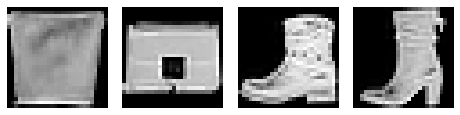

### Generations from optimized noise:

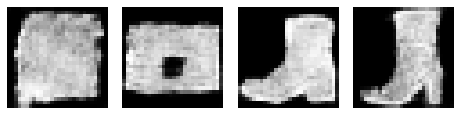

In [7]:
lrs = [0.1]
n_iterations = 1000
results_dict = dict()

for task_id in range(NUM_BATCHES):
    display(Markdown(f"# <span style='color:blue'>Task nr {task_id}</span>"))
    
    results_dict[task_id] = dict()
    # select random imgs from current task to optimize
    random_img_idxs = np.random.choice(len(train_dataset_splits[task_id].dataset), size=N_IMAGES_TO_OPTIMIZE, replace=False)
    random_imgs = torch.stack([train_dataset_splits[task_id].dataset[i][0] for i in random_img_idxs]).to(DEVICE)
    random_classes = [train_dataset_splits[task_id].dataset[i][1] for i in random_img_idxs]
    # select random indexes to visualize
    random_img_vis_idxs = []
    classes_chosen = []
    
    for cls_idx in range(task_id*2, task_id*2 + 2):
        while classes_chosen.count(cls_idx) < N_IMGS_TO_VISUALIZE//2:
            random_img_idx = np.random.choice(N_IMAGES_TO_OPTIMIZE, size=1)[0]
            if random_img_idx not in random_img_vis_idxs and random_classes[random_img_idx] == cls_idx:
                random_img_vis_idxs.append(random_img_idx)
                classes_chosen.append(cls_idx)    
            
    task_ids = (torch.zeros([N_IMAGES_TO_OPTIMIZE]) + task_id).to(DEVICE)
    
    generator = torch.load(os.path.join(MODELS_DIR, f'model{task_id}_curr_local_generator'), map_location=DEVICE)
    
    for lr in lrs:
        display(Markdown(f"### Learning rate of noise optimization = {lr}"))
        optimized_noise, losses = optimize_noise(
            random_imgs,
            generator,
            n_iterations,
            task_id,
            lr,
        )
        results_dict[task_id][lr] = (optimized_noise, losses, random_classes)
        
        display(Markdown(f"### Original images:"))
        vis_image_grid(random_imgs.cpu().numpy()[random_img_vis_idxs])
        generations_from_optimized_noise = generator(optimized_noise, task_ids)
        display(Markdown(f"### Generations from optimized noise:"))
        vis_image_grid(generations_from_optimized_noise[random_img_vis_idxs].cpu().detach().numpy())

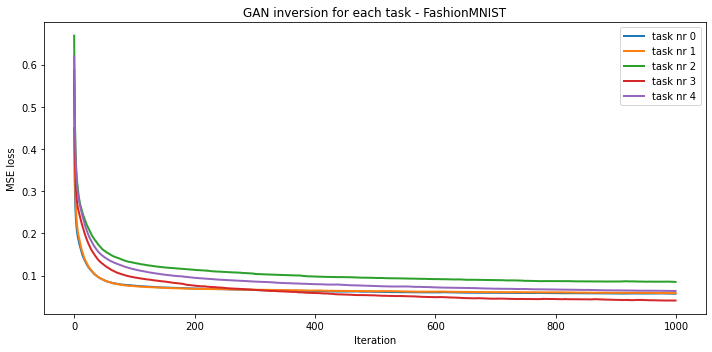

In [8]:
plt.figure(figsize=(10, 5))
for task_id in range(NUM_BATCHES):
    for lr, (noise, loss, _) in results_dict[task_id].items():
        plt.plot(loss, label=f"task nr {task_id}", linewidth=2)
        

plt.legend()
plt.ylabel('MSE loss')
plt.xlabel('Iteration')
plt.title(f'GAN inversion for each task - {DATASET}')
plt.tight_layout()
plt.show()

## Visualization of optimized noises

In [7]:
import umap
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [10]:
concat_noises = torch.cat([results_dict[task_id][0.1][0] for task_id in range(NUM_BATCHES)])

In [11]:
concat_noises.shape

torch.Size([5000, 100])

In [12]:
reducer = umap.UMAP()

In [ ]:
emb = reducer.fit_transform(concat_noises.cpu().detach().numpy())

In [14]:
emb.shape

(5000, 2)

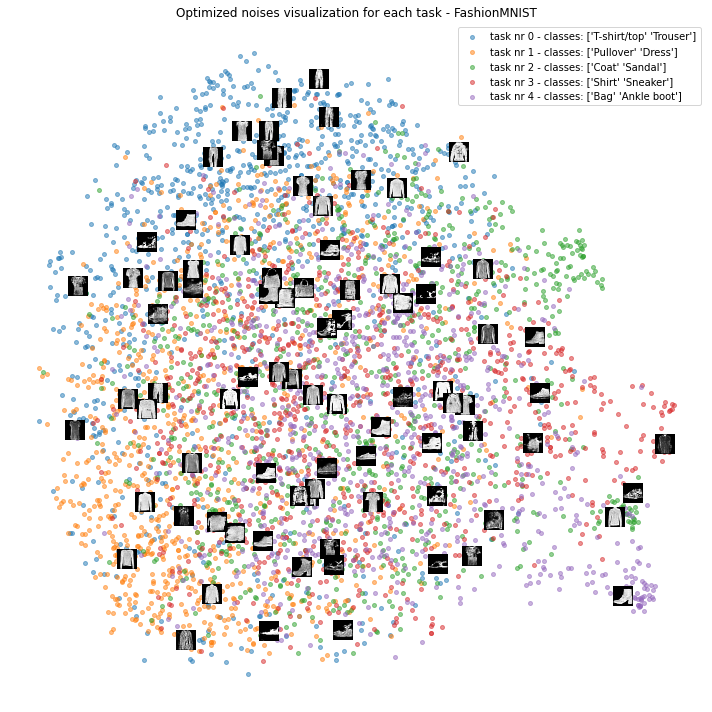

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
for task_id in range(NUM_BATCHES):
    xs = emb[task_id*N_IMAGES_TO_OPTIMIZE:(task_id+1)*N_IMAGES_TO_OPTIMIZE, 0]
    ys = emb[task_id*N_IMAGES_TO_OPTIMIZE:(task_id+1)*N_IMAGES_TO_OPTIMIZE, 1]
    
    ax.scatter(xs, ys, label=f"task nr {task_id} - classes: {np.array(train_dataset.dataset.classes)[[x for x in range(task_id*2, (task_id*2)+2)]]}", s=16, alpha=0.5)
    
    generator = torch.load(os.path.join(MODELS_DIR, f'model{task_id}_curr_local_generator'), map_location=DEVICE)
    task_ids = (torch.zeros([1]) + task_id).to(DEVICE)
    
    for i, (x, y) in enumerate(zip(xs, ys)):
        if i % 60 == 0:
            # generate
            n = concat_noises[i].unsqueeze(0)
            generation = generator(n.to(DEVICE), task_ids)[0]
            generation = generation.cpu().detach().numpy()
            generation = np.swapaxes(generation, 0, 2)
            generation = np.swapaxes(generation, 0, 1)
            imagebox = OffsetImage(generation, zoom = 0.7, cmap="gray")
            ab = AnnotationBbox(imagebox, (x, y), frameon = False)
            ax.add_artist(ab)
    
plt.title(f'Optimized noises visualization for each task - {DATASET}')
plt.axis('off')
plt.tight_layout()
plt.legend()
plt.show()

## Visualization of optimized noises per task

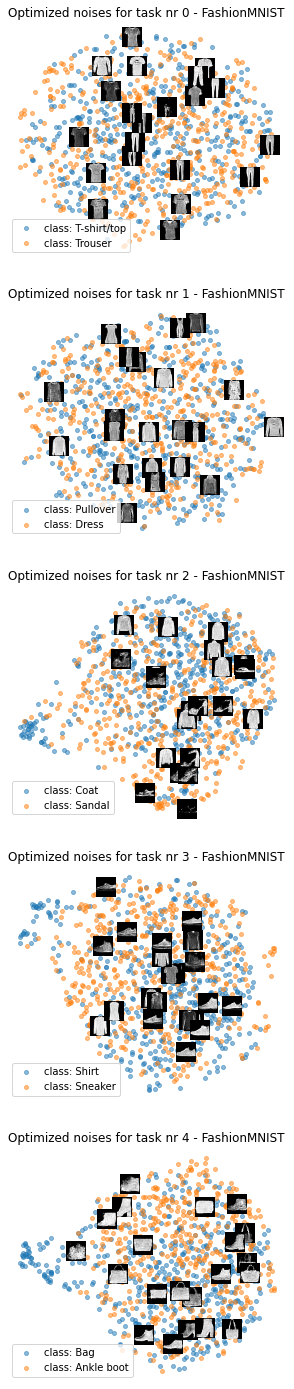

In [16]:
fig, ax = plt.subplots(nrows=NUM_BATCHES, ncols=1)
fig.set_figheight(25)
fig.set_figwidth(5)

for task_id in range(NUM_BATCHES):
    for lr, (noise, loss, classes) in results_dict[task_id].items():
        reducer = umap.UMAP()
        emb = reducer.fit_transform(noise.cpu().detach().numpy())
        generator = torch.load(os.path.join(MODELS_DIR, f'model{task_id}_curr_local_generator'), map_location=DEVICE)
        task_ids = (torch.zeros([N_IMAGES_TO_OPTIMIZE]) + task_id).to(DEVICE)
        generations = generator(noise, task_ids)
        for i in np.unique(classes):
            xs = emb[np.array(classes)==i][:,0]
            ys = emb[np.array(classes)==i][:,1]
            gen = generations[np.array(classes)==i]
            
            ax[task_id].scatter(xs, ys, label=f"class: {train_dataset.dataset.classes[i]}", s=16, alpha=0.5)
            ax[task_id].set_title(f"Optimized noises for task nr {task_id} - {DATASET}")
            ax[task_id].axis('off')
            ax[task_id].legend()
            

            for j in range(len(gen)):
                if j % 50 == 0:
                    generation = gen[j].cpu().detach().numpy()
                    generation = np.swapaxes(generation, 0, 2)
                    generation = np.swapaxes(generation, 0, 1)
                    imagebox = OffsetImage(generation, zoom = 0.7, cmap="gray")
                    ab = AnnotationBbox(imagebox, (xs[j], ys[j]), frameon = False)
                    ax[task_id].add_artist(ab)
        
plt.show()

## Visualization of optimized noises in local translator's latent space per task

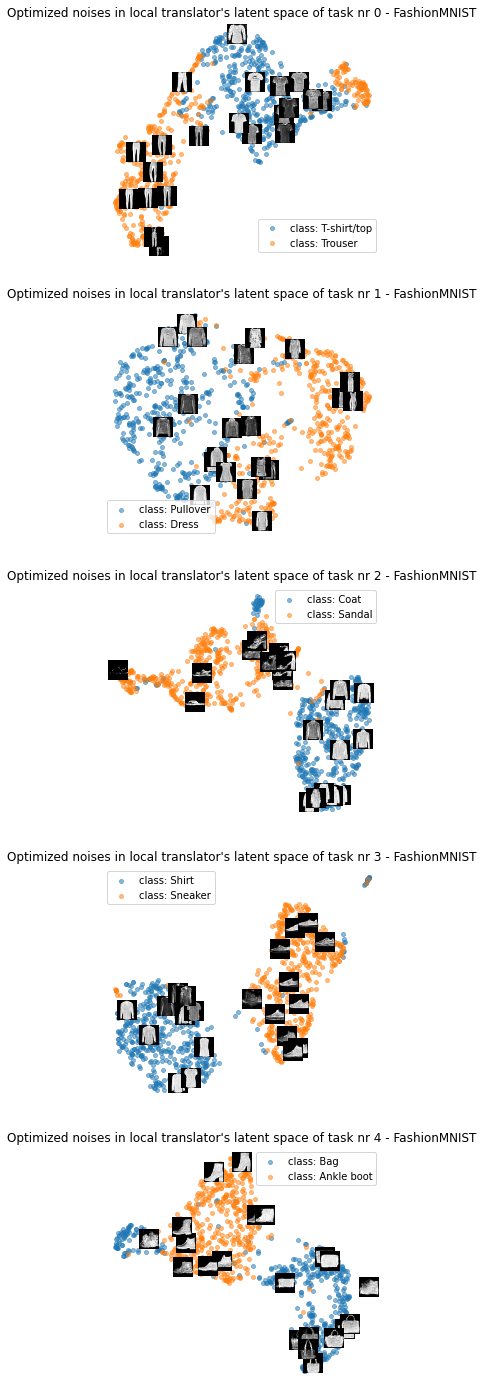

In [17]:
fig, ax = plt.subplots(nrows=NUM_BATCHES, ncols=1)
fig.set_figheight(25)
fig.set_figwidth(5)

for task_id in range(NUM_BATCHES):
    for lr, (noise, loss, classes) in results_dict[task_id].items():
        reducer = umap.UMAP()
        generator = torch.load(os.path.join(MODELS_DIR, f'model{task_id}_curr_local_generator'), map_location=DEVICE)
        task_ids = (torch.zeros([N_IMAGES_TO_OPTIMIZE]) + task_id).to(DEVICE)
        generations, translator_emb = generator(noise, task_ids, return_emb=True)

        emb = reducer.fit_transform(translator_emb.cpu().detach().numpy())
        for i in np.unique(classes):
            xs = emb[np.array(classes)==i][:,0]
            ys = emb[np.array(classes)==i][:,1]
            gen = generations[np.array(classes)==i]
            
            ax[task_id].scatter(xs, ys, label=f"class: {train_dataset.dataset.classes[i]}", s=16, alpha=0.5)
            ax[task_id].set_title(f"Optimized noises in local translator\'s latent space of task nr {task_id} - {DATASET}")
            ax[task_id].axis('off')
            ax[task_id].legend()
            

            for j in range(len(gen)):
                if j % 50 == 0:
                    generation = gen[j].cpu().detach().numpy()
                    generation = np.swapaxes(generation, 0, 2)
                    generation = np.swapaxes(generation, 0, 1)
                    imagebox = OffsetImage(generation, zoom = 0.7, cmap="gray")
                    ab = AnnotationBbox(imagebox, (xs[j], ys[j]), frameon = False)
                    ax[task_id].add_artist(ab)
        
plt.show()

## Visualization of global latent space

In [8]:
global_generator = torch.load(os.path.join(MODELS_DIR, f'model4_curr_global_generator'), map_location=DEVICE)
all_noises = []
all_emb = []
all_task_ids = []

for task_id in range(NUM_BATCHES):
    rand_noise = torch.randn([300, 100]).to(DEVICE)
    task_ids = (torch.zeros([300]) + task_id).to(DEVICE)
    generations, emb = global_generator(rand_noise, task_ids, return_emb=True)
    all_noises.append(rand_noise)
    all_emb.append(emb)
    all_task_ids.append(task_ids)

In [9]:
all_noises = torch.cat([x for x in all_noises])
all_emb = torch.cat([x for x in all_emb])
all_task_ids = torch.cat([x for x in all_task_ids])

In [ ]:
reducer = umap.UMAP()
emb = reducer.fit_transform(all_emb.cpu().detach().numpy())

In [11]:
emb.shape

(1500, 2)

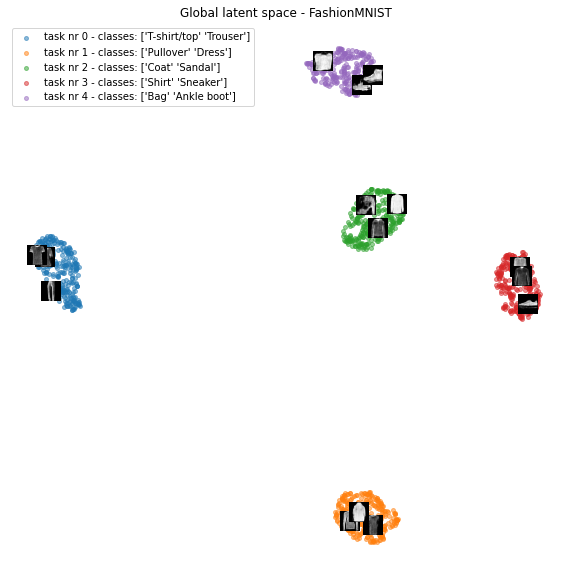

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

for task_id in range(NUM_BATCHES):
    xs = emb[task_id*300:(task_id+1)*300,0]
    ys = emb[task_id*300:(task_id+1)*300,1]
    ax.scatter(xs, ys, label=f"task nr {task_id} - classes: {np.array(train_dataset.dataset.classes)[[x for x in range(task_id*2, (task_id*2)+2)]]}", s=16, alpha=0.5)
    
    for j, (x, y) in enumerate(zip(xs, ys)):
        if j % 100 == 0:
            # generate
            n = all_noises[task_id*300 + j].unsqueeze(0)
            generation = global_generator(n.to(DEVICE), (torch.zeros([1]) + task_id).to(DEVICE))[0]
            generation = generation.cpu().detach().numpy()
            generation = np.swapaxes(generation, 0, 2)
            generation = np.swapaxes(generation, 0, 1)
            imagebox = OffsetImage(generation, zoom = 0.7, cmap="gray")
            ab = AnnotationBbox(imagebox, (x, y), frameon = False)
            ax.add_artist(ab)

plt.title(f"Global latent space - {DATASET}")    
plt.axis('off')
plt.legend()
plt.show()